In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv("height_weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

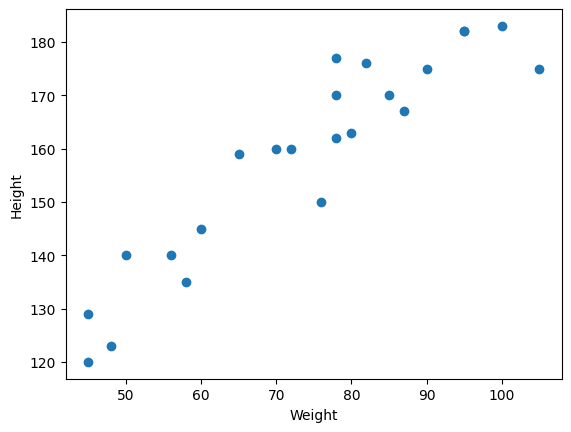

In [6]:
## scattered plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [ ]:
## finding correlation
df.corr()  ## positive correlatiom

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


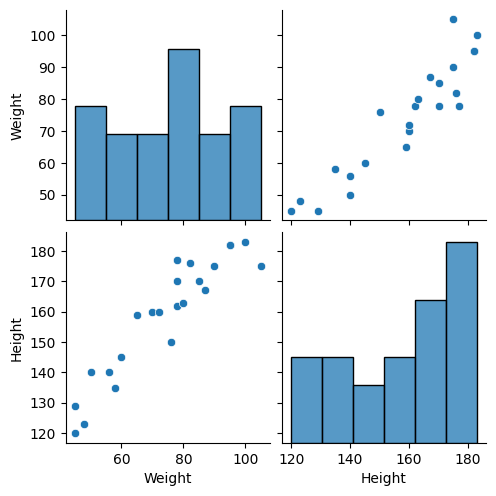

In [9]:
## seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [5]:
## independent and dependent feature -- indepen
x = df[['Weight']]    ## independ feature should be data frame or 2D array
np.array(x).shape

# np.array(x).shape  ## 2D array
y = df['Height']   # this variable can be series or 1D array
np.array(y).shape

(23,)

In [ ]:
x_series = df['Weight']
np.array(x_series).shape   ## 1D array

(23,)

In [108]:
np.array(y).shape

(23,)

In [36]:
 ### Train Test split -- evaluate the performace of model

from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=42 )
X_train.shape

(17, 1)

In [42]:
## standardization  - z-score --- mean is equal to 0 and standard deviation is 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)


array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [68]:
X_test = scaler.transform(X_test)
X_test

c:\Users\Tejas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-4.67338039],
       [-4.67338039],
       [-4.67338039],
       [-4.67338039],
       [-4.67338039],
       [-4.67338039]])

In [74]:
## apply simple linear regression
from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs = -1)


In [75]:
regression.fit(X_train,y_train)


LinearRegression(n_jobs=-1)

In [79]:
print("coeffitient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)



coeffitient or slope: [1.04792503]
Intercept: 80.52684512622542


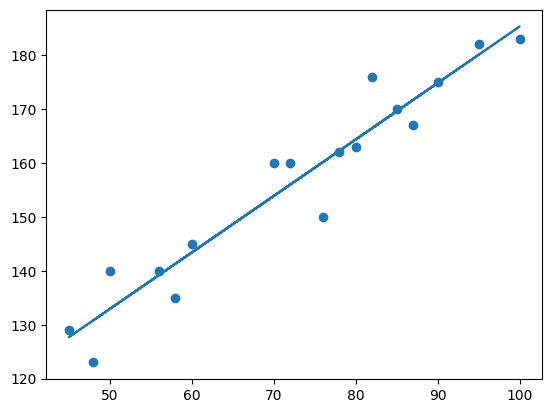

In [81]:
## plot training dat plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

prediction of test data
1. prediction hight output = intercept + coef_(Weights)
2. y_pred_test = 80.526 + 1.04 (x_test)

In [84]:
## prediction for the test data
y_pred = regression.predict(X_test)

c:\Users\Tejas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [85]:
## performance metrices
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8215.05636442678
88.20384048066099
90.63694811955432


R square 
formula = R ^ 2 = 1 - SSR/SST
R^ 2 = coeffitient of determenation SSR = sum of square of residue SST = total sum of squares

In [88]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

-17.879159216046222


## adjusted R2 - 1-[(1-R2) *(n-1)/(n-k-1)]
## where R2 : The R2 of the model n : the number of observation k : the number of predictor variable

In [89]:
## display adjusted R-squared:
1 - (1-score) * (len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)

-22.598949020057777

In [97]:
# ols linear regression
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()


In [102]:
prediction=model.predict(X_test)
print(prediction)

[-9.83412277 -9.83412277 -9.83412277 -9.83412277 -9.83412277 -9.83412277]


In [103]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1133.
Date:                Sun, 06 Jul 2025   Prob (F-statistic):                    2.80e-16
Time:                        11:12:04   Log-Likelihood:                         -73.806
No. Observations:                  17   AIC:                                      149.6
Df Residuals:                      16   BIC:                                      150.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\Tejas\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [106]:
## prediction for the new data 
regression.predict(scaler.transform([[72]]))

c:\Users\Tejas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Tejas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([80.49697064])

In [4]:
## create own
import pandas as pd
data = {"age":[12,13,14],"height":[140,142,143]}

df = pd.DataFrame(data)
df
correlation = df.corr()
print(correlation)

             age    height
age     1.000000  0.981981
height  0.981981  1.000000


In [2]:
### marks and percentage
import numpy as np
import pandas as pd
import seaborn as sna
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv("Marks_Percentage.csv")

In [3]:
df.head()

,Marks,Percentage
0,45,0.00
1,58,23.81
2,48,4.76
3,60,39.68
4,70,63.49


Text(0, 0.5, 'Height')

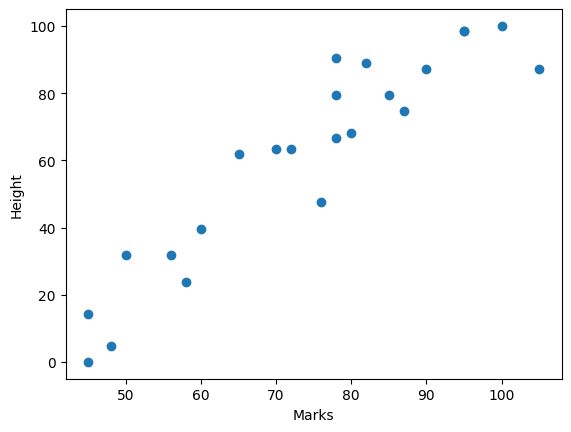

In [4]:
plt.scatter(df['Marks'],df['Percentage'])
plt.xlabel("Marks")
plt.ylabel("Height")

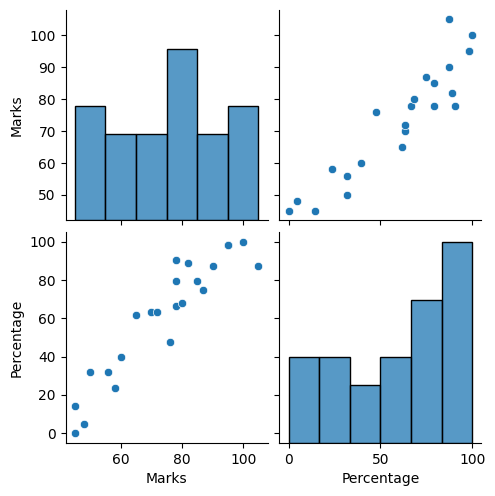

In [7]:
import seaborn as sns
sns.pairplot(df)

In [18]:
## independent and dependent feature -- indepen
import numpy as np
x = df[['Marks']]
np.array(x).shape
y = df['Percentage']
np.array(y).shape

(23,)

In [25]:
 ### Train Test split -- evaluate the performace of model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
X_train.shape


(17, 1)

In [26]:
## standardization  - z-score --- mean is equal to 0 and standard deviation is 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [27]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [28]:
## apply simple linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs = -1)

In [29]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [30]:
print("coeffitient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

coeffitient or slope: [1.66331577]
Intercept: -62.651472037385034


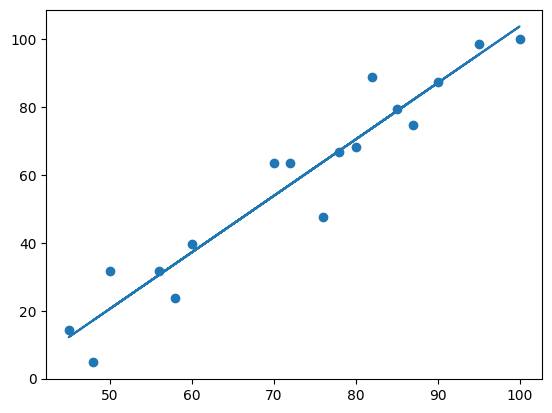

In [33]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [32]:
## prediction for the test data
y_pred = regression.predict(X_test)

c:\Users\Tejas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

18333.298400182724
131.70456291346704
135.40051107799675


In [35]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

-15.721918246613388


In [36]:
1 - (1-score) * (len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)

-19.902397808266734

In [37]:

# ols linear regression
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()


In [38]:
prediction=model.predict(X_test)
print(prediction)

[ 0.28186096  0.28186096 -1.40030924  1.14843349 -0.38081215  1.65818204]


In [39]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:             Percentage   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              242.2
Date:                Mon, 07 Jul 2025   Prob (F-statistic):                    4.40e-11
Time:                        07:06:46   Log-Likelihood:                         -71.336
No. Observations:                  17   AIC:                                      144.7
Df Residuals:                      16   BIC:                                      145.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\Tejas\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [40]:
## prediction for the new data 
regression.predict(scaler.transform([[72]]))

c:\Users\Tejas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Tejas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-62.69889022])